<a href="https://colab.research.google.com/github/mw1849/nyu-python-public-policy/blob/master/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**STEP ONE:** Select an indicator from the Community District Profiles data that you want to analyze for this assignment. Create a dataframe that only captures the borocd and selected indicator column.

In [3]:
#import cleaned 311 complaints file
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#import raw "indicators" dataset
df2 = pd.read_csv('https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20cartodb_id,the_geom,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,lots_parking,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc%20FROM%20community_district_profiles&filename=indicators.csv', header='infer')

In [0]:
#manipulate dataset to only include 'borocd' and 'pct_hh_rent_burd'
indicators = df2[['borocd', 'pct_hh_rent_burd']]

In [6]:
#check to see if code above worked
indicators.head()

,borocd,pct_hh_rent_burd
0,101,31.0
1,102,31.0
2,103,38.5
3,104,33.8
4,105,33.8


**STEP TWO:** Review the complaint types in the 311 complaint data. Choose the complaint type(s) you hypothesize should correlate with the indicator you chose in Step 2. Create a new dataframe that only captures the 311 complaints you want to analyze.

In [7]:
#review complaint types in the 311 complaint data
set(df['complaint_type'])

{'APPLIANCE',
 'Abandoned Vehicle',
 'Advocate - Lien',
 'Advocate - Other',
 'Advocate - RPIE',
 'Advocate-Co-opCondo Abatement',
 'Advocate-Commercial Exemptions',
 'Advocate-Personal Exemptions',
 'Advocate-Prop Refunds/Credits',
 'Advocate-Property Value',
 'Air Quality',
 "Alzheimer's Care",
 'Animal Abuse',
 'Animal Facility - No Permit',
 'Animal in a Park',
 'Animal-Abuse',
 'Asbestos',
 'BEST/Site Safety',
 'Beach/Pool/Sauna Complaint',
 'Benefit Card Replacement',
 'Bereavement Support Group',
 'Bike Rack Condition',
 'Bike/Roller/Skate Chronic',
 'Blocked Driveway',
 'Boilers',
 'Borough Office',
 'Bottled Water',
 'Bridge Condition',
 'Broken Parking Meter',
 'Building Marshals office',
 'Building/Use',
 'Bus Stop Shelter Complaint',
 'Bus Stop Shelter Placement',
 'Calorie Labeling',
 'Case Management Agency Complaint',
 'Collection Truck Noise',
 'Comments',
 'Construction Safety Enforcement',
 'Consumer Complaint',
 'Cooling Tower',
 'Cranes and Derricks',
 'Curb Conditi

In [0]:
#Create a new dataframe that only captures the 'UNSANITARY CONDITION' complaints
unsanitary = df[df.complaint_type == 'UNSANITARY CONDITION']

In [9]:
#check code to see if it worked
unsanitary.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
20,20,20,39899417,08/01/2018 12:07:22 AM,08/16/2018 09:58:39 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10457,1755 CLAY AVENUE,CLAY AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/16/2018 09:58:39 AM,05 BRONX,2.027990e+09,BRONX,1010591.0,247332.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.845505,-73.904795,"(40.84550502951069, -73.9047946370933)",205.0
94,94,94,39897846,08/01/2018 12:33:15 AM,08/08/2018 08:09:38 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10304,79 OSGOOD AVENUE,OSGOOD AVENUE,NaN,NaN,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/08/2018 08:09:38 AM,01 STATEN ISLAND,5.005600e+09,STATEN ISLAND,961196.0,164759.0,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618872,-74.083042,"(40.61887185441726, -74.08304210343434)",501.0
114,116,116,39896395,08/01/2018 12:45:09 AM,08/13/2018 10:39:15 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10469,3139 GUNTHER AVENUE,GUNTHER AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/13/2018 10:39:15 AM,12 BRONX,2.047690e+09,BRONX,1028403.0,257426.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.873139,-73.840350,"(40.8731388816512, -73.84034961214721)",212.0
115,117,117,39897892,08/01/2018 12:45:10 AM,08/13/2018 10:39:16 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10469,3139 GUNTHER AVENUE,GUNTHER AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/13/2018 10:39:16 AM,12 BRONX,2.047690e+09,BRONX,1028403.0,257426.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.873139,-73.840350,"(40.8731388816512, -73.84034961214721)",212.0
116,118,118,39893779,08/01/2018 12:45:10 AM,08/13/2018 10:39:16 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10469,3139 GUNTHER AVENUE,GUNTHER AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/13/2018 10:39:16 AM,12 BRONX,2.047690e+09,BRONX,1028403.0,257426.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.873139,-73.840350,"(40.8731388816512, -73.84034961214721)",212.0


**Step 3.** Write out the hypothesis for your analysis. What relationship are you expecting to find between the variables and why?

My hypothesis for this analysis is as follows: I expect that the higher the percentage of households that spend 35% or more of their income on rent in the Public Use Microdata Area (PUMA) that CD roughly matches, the less complaints that 311 received regarding "Unsanitary Conditions". My reasoning for this is as follows: if an individual's rent burden is high, they will probably try to work longer hours or multiple jobs in order to afford their rent. As such, they will barely have enough time to complain at all.

**Step 4.** Get the count of 311 complaints per community district (borocd) using the filtered dataframe you created in Step 2.

In [0]:
#create smaller dataset with count of 311 complaints per community district
unsanitary2 = unsanitary.groupby('borocd').size().reset_index(name='count')

In [11]:
#check if code above worked
unsanitary2.tail()

,borocd,count
54,413.0,602
55,414.0,1391
56,501.0,1680
57,502.0,322
58,503.0,206


**Step 5.** Join the indicator dataframe (from Step 1) with 311 counts dataframe (from Step 4) using the borocd value.

In [0]:
#joining indicator dataframe with 311 counts dataframe
merged_data = pd.merge(how = 'left', left=unsanitary2, right= indicators, left_on = 'borocd', right_on = 'borocd')

In [14]:
#checking if merge worked
merged_data.head()

,borocd,count,pct_hh_rent_burd
0,101.0,101,31.0
1,102.0,495,31.0
2,103.0,1108,38.5
3,104.0,889,33.8
4,105.0,278,33.8


In [15]:
#check if there are any missing values and fill it in with 0 if there are; there shouldn't be any based on a brief look at the data, but just in case
merged_data = merged_data.fillna(0)
merged_data.head()

,borocd,count,pct_hh_rent_burd
0,101.0,101,31.0
1,102.0,495,31.0
2,103.0,1108,38.5
3,104.0,889,33.8
4,105.0,278,33.8


In [16]:
#check type of 'pct_hh_rent_burd' column
type(merged_data.pct_hh_rent_burd)

pandas.core.series.Series

In [17]:
#check type of 'count' column
type(merged_data.count)

method

In [0]:
#since the 'count' column is a 'method' type, we need to change 'count' values into integers
merged_data.count = merged_data['count'].astype('int64')

In [19]:
#check type of 'count' column again
type(merged_data.count)

pandas.core.series.Series

**Step 6.** Produce a scatter plot of the indicator values vs. 311 complaint counts. There should be one point per community district.

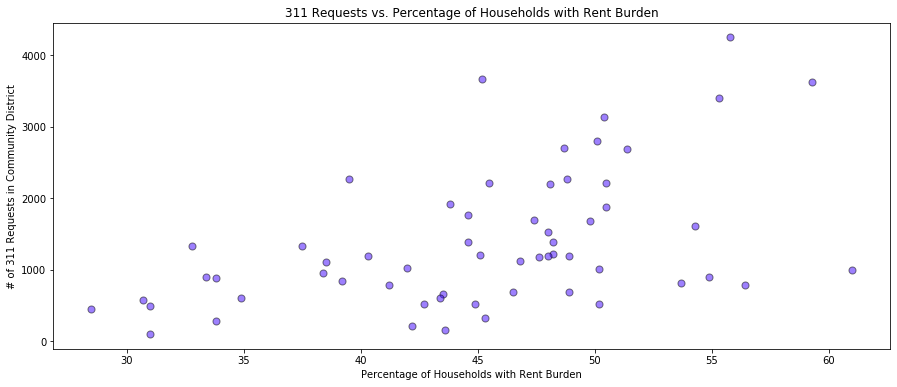

In [20]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data.pct_hh_rent_burd), # x
    np.array(merged_data.count), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('311 Requests vs. Percentage of Households with Rent Burden')
plt.xlabel('Percentage of Households with Rent Burden')
plt.ylabel('# of 311 Requests in Community District')

plt.show()


**Step 7.** Conduct an OLS linear regression using the indicator values vs. 311 complaint counts and interpret the results.

In [21]:
# y = dependent variable (# of 311 complaints regarding 'Unsanitary Conditions')
y = np.array(merged_data.count)

# x = Percentage of households with Rent Burden
x = np.array(merged_data.pct_hh_rent_burd)
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[ 1.  31. ]
 [ 1.  31. ]
 [ 1.  38.5]
 [ 1.  33.8]
 [ 1.  33.8]
 [ 1.  34.9]
 [ 1.  32.8]
 [ 1.  33.4]
 [ 1.  44.6]
 [ 1.  39.5]
 [ 1.  37.5]
 [ 1.  45.2]
 [ 1.  48.2]
 [ 1.  48.2]
 [ 1.  50.5]
 [ 1.  55.8]
 [ 1.  59.3]
 [ 1.  50.5]
 [ 1.  55.3]
 [ 1.  45.1]
 [ 1.  48.8]
 [ 1.  39.2]
 [ 1.  47.6]
 [ 1.  51.4]
 [ 1.  40.3]
 [ 1.  30.7]
 [ 1.  45.5]
 [ 1.  47.4]
 [ 1.  48.7]
 [ 1.  28.5]
 [ 1.  50.2]
 [ 1.  43.8]
 [ 1.  48.1]
 [ 1.  43.5]
 [ 1.  48.9]
 [ 1.  61. ]
 [ 1.  46.5]
 [ 1.  50.1]
 [ 1.  48. ]
 [ 1.  54.3]
 [ 1.  50.4]
 [ 1.  42. ]
 [ 1.  38.4]
 [ 1.  42.7]
 [ 1.  53.7]
 [ 1.  54.9]
 [ 1.  41.2]
 [ 1.  44.9]
 [ 1.  56.4]
 [ 1.  48.9]
 [ 1.  46.8]
 [ 1.  50.2]
 [ 1.  43.6]
 [ 1.  48. ]
 [ 1.  43.4]
 [ 1.  44.6]
 [ 1.  49.8]
 [ 1.  45.3]
 [ 1.  42.2]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0

**Step 8.** Use the linear regression results to add a line of best fit to your scatterplot

In [23]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [-1450.11625792    62.91178698]
R2: 0.24061755693155462


In [24]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = 62.91x + -1450.12; R2 = 0.241


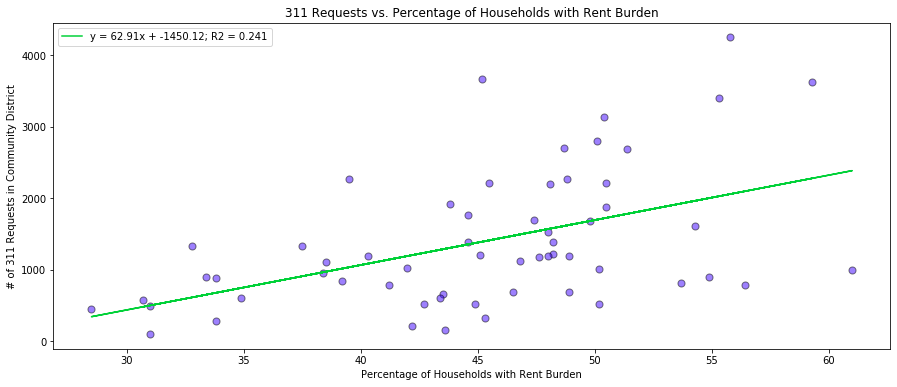

In [25]:
# x_dummy = np.arange(0,max(cd_data['2010 Population'])/1000)
x_dummy = np.array(merged_data.pct_hh_rent_burd)

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data.pct_hh_rent_burd), # x
    np.array(merged_data.count), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', # lighter green
    label=label)

plt.title('311 Requests vs. Percentage of Households with Rent Burden')
plt.xlabel('Percentage of Households with Rent Burden')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()

plt.show()

**Step 9.** Write a paragraph explaining the results of your analysis? Have you found a meaningful relationship?

The results indicate that for every additional percentage of households that have rent burden (that is, that spend 35% or more of their income on rent) in the community district, there will be 62.9118 (or approximately 63) more complaints regarding unsanitary conditions in the community district. (The coefficient for x1 is 62.9118.) The relationship between the percentage of households that have rent burden in a community district and the number of complaint requests regarding unsanitary conditions is significant as the regression results indicate that  P>|t| = 0. This result is not what I expected. However, it makes sense, as presumably, those with higher rent burden may also be individuals who are lower-income, and therefore can only afford to live in neighborhoods or buildings where the conditions are not as clean or well-kept. The situation may be bad enough that residents will then make complaints to 311 regarding the unsanitary conditions, regardless of whether they are working multiple jobs or may not have time to do so. This can be an interesting hypothesis to explore in future analyses.